In [ ]:
import pandas as pd


In [3]:
import pandas as pd
dataset = pd.read_csv("Leads.csv")

In [14]:
import pandas as pd
dataset = pd.read_csv("Leads.csv")
dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# Import all the libraries for Data Analysis, Visualisation & Logisic Regression

# Libraries for Dataset analysis
import pandas as pd
import numpy as np

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import StandardScaler

# For building logistic regression model
import statsmodels.api as sm

# Import RFE used in feature elimination
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


# Check for VIF value of the variable
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import  compute accuracy scores & Confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


In [ ]:
#Set option to display max 100 columns & 500 rows
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows", 500)


# 1 : Data Analysis - Analyse & Visualize the features in the Leads Data Set


In [ ]:
# Read the data from the CSV file into a DataFrame
leads_df = pd.read_csv("Leads.csv")


In [6]:
#Get the shape (row and column count of the data)
leads_df = pd.read_csv("Leads.csv")
leads_df.shape


(9240, 37)

In [7]:
#Get the columns wise info - Datatypes and missing values
leads_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
#Check the sample values using df.head()
leads_df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
#Check the sample values using df.tail()
leads_df.tail()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,...,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,...,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [10]:
#Get the distribution of Numerical values
leads_df.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [11]:
# Check the column wise null percentages.

leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])


Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64


In [12]:
# Check the row wise null percentages. Find rows with more than 30% of Column data having NULLs

leads_null_rows=round(((leads_df.isna().sum(axis=1))/leads_df.shape[1]) * 100,2)
print(leads_null_rows[leads_null_rows > 30])


963     32.43
1363    32.43
2633    32.43
2635    32.43
2671    35.14
        ...  
7400    32.43
8203    32.43
8216    32.43
8252    32.43
8544    32.43
Length: 645, dtype: float64


In [13]:
# Check the unique counts for all columns across the data set
for x in leads_df.columns:
    print(x+':',len(leads_df[x].unique()))


Prospect ID: 9240
Lead Number: 9240
Lead Origin: 5
Lead Source: 22
Do Not Email: 2
Do Not Call: 2
Converted: 2
TotalVisits: 42
Total Time Spent on Website: 1731
Page Views Per Visit: 115
Last Activity: 18
Country: 39
Specialization: 20
How did you hear about X Education: 11
What is your current occupation: 7
What matters most to you in choosing a course: 4
Search: 2
Magazine: 1
Newspaper Article: 2
X Education Forums: 2
Newspaper: 2
Digital Advertisement: 2
Through Recommendations: 2
Receive More Updates About Our Courses: 1
Tags: 27
Lead Quality: 6
Update me on Supply Chain Content: 1
Get updates on DM Content: 1
Lead Profile: 7
City: 8
Asymmetrique Activity Index: 4
Asymmetrique Profile Index: 4
Asymmetrique Activity Score: 13
Asymmetrique Profile Score: 11
I agree to pay the amount through cheque: 1
A free copy of Mastering The Interview: 2
Last Notable Activity: 16


In [ ]:
# removing the column Prospect ID; Lead Number is a unique value already
leads_df = leads_df.drop('Prospect ID', axis=1)

# removing the five columns which are constant across all rows; they don't add any value to the model
leads_df = leads_df.drop('Magazine', axis=1)
leads_df = leads_df.drop('Receive More Updates About Our Courses', axis=1)
leads_df = leads_df.drop('Update me on Supply Chain Content', axis=1)
leads_df = leads_df.drop('Get updates on DM Content', axis=1)
leads_df = leads_df.drop('I agree to pay the amount through cheque', axis=1)


In [14]:
leads_df.shape


(9240, 37)

In [15]:
# The rows for which the count of Null fields is greater than 1/3rd ( > 10) are to be removed 
# and rows with <= 1/3rd (<=10) are retained

leads_df = leads_df[leads_df.isnull().sum(axis=1) <= 10]
leads_df.shape


(8576, 37)

# Univariate Analysis of Categorical variables


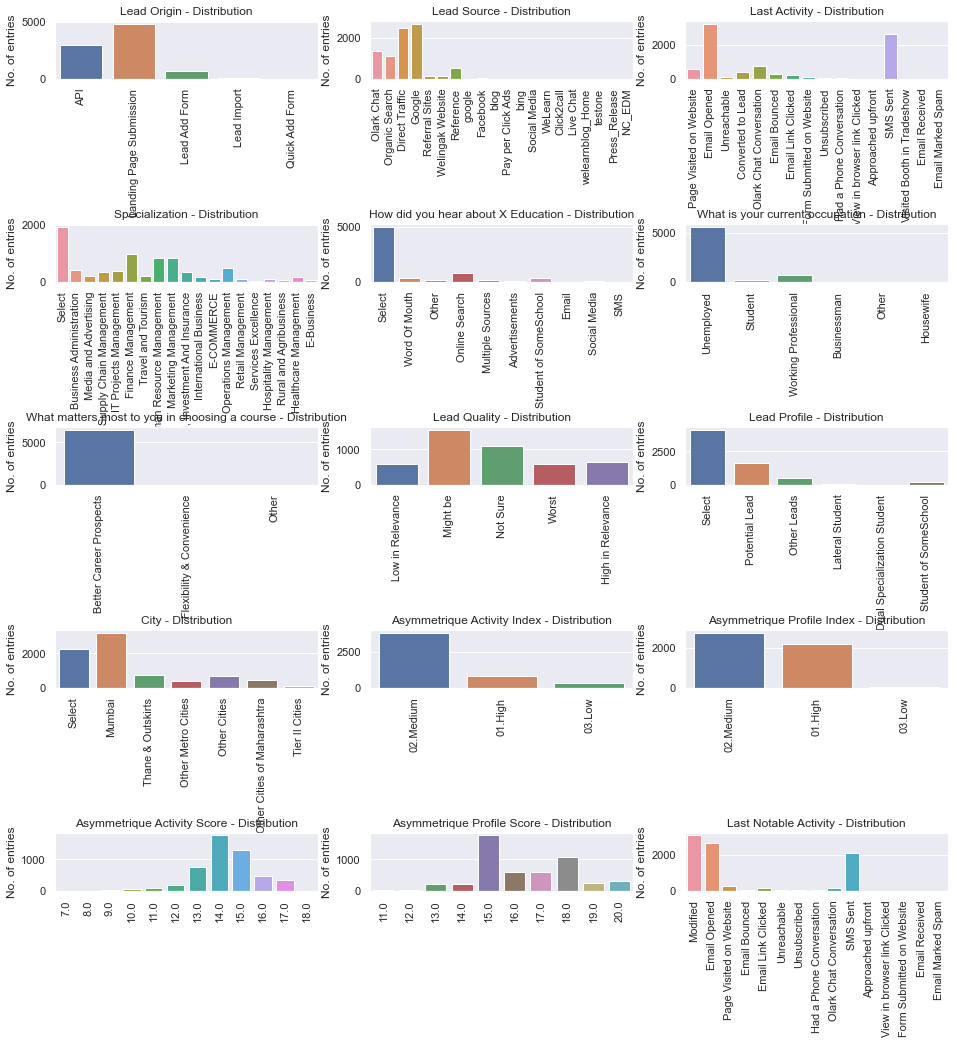

In [17]:
# For Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Check the distribution of Categorical variables to get an idea of how the values are spread
col_list_for_count=['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity']
sns.set(style="darkgrid")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count)):
    plt.subplot(5, 3, i+1)
    var=col_list_for_count[i]
    sns.countplot(x=var, data=leads_df)
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 2.5)


# From above Univariate Analysis of Categorical variables, we can see that a value called "Select" is present in some of the fields. This is mostly a drop-down value which was left as it is - as good as Data Not available. We can consider it as NaN.


In [ ]:
# Assign the np.NaN to the column values which are mentioned as Select
select_varlist = ['Specialization','How did you hear about X Education','Lead Profile','City']

##Check the Unique values with counts in all remaining fields after replacing with np.NaN
for x in select_varlist:
    leads_df[x].replace('Select',np.NaN,inplace=True)


In [18]:
# Check the column wise null percentages. And start handling the NULL values

leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])


Lead Source                                       0.41
TotalVisits                                       1.57
Page Views Per Visit                              1.57
Last Activity                                     1.19
Country                                          23.85
Specialization                                    9.17
How did you hear about X Education               18.00
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     23.86
City                                              8.92
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
Asymmetrique Activity Score                      41.45
Asymmetrique Profile Score                       41.45
dtype: float64


# Bivariate Analysis of Categorical variables


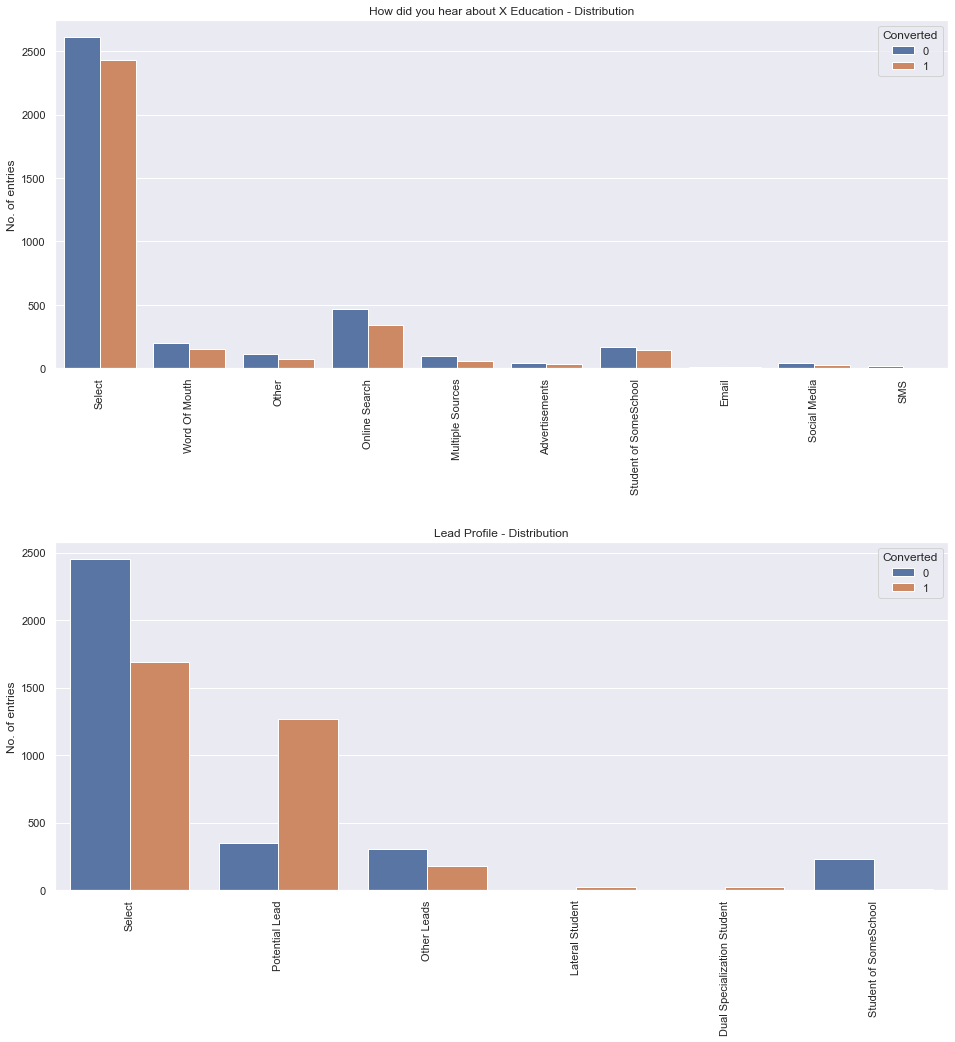

In [19]:
# Check the variables with very high NULL values
col_list_for_count3=['How did you hear about X Education','Lead Profile']
sns.set(style="darkgrid")

# Visualising the histogram of the distribution of these two categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count3)):
    plt.subplot(2, 1, i+1)
    var=col_list_for_count3[i]
    #sns.countplot(leads_df[var])
    sns.countplot(x= var, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)


In [ ]:
# Drop the columns with more than 50% NULL values & adding no value to the Model

# Drop "How did you hear about X Education" column as it has very high NULL values & doesn't have much inference from it
leads_df=leads_df.drop('How did you hear about X Education',axis=1)


In [20]:
# Check the values of Asymmetric Index and Score
print(leads_df['Asymmetrique Activity Index'].value_counts())
print(leads_df['Asymmetrique Activity Score'].value_counts())
print(leads_df['Asymmetrique Profile Index'].value_counts())
print(leads_df['Asymmetrique Profile Score'].value_counts())


02.Medium    3839
01.High       820
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     348
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64
02.Medium    2787
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64
15.0    1758
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64


# Cleaning values in Assymetrique Columns


In [21]:
## Update the values in Assymmetrique columns
assymm_index_list = ['Asymmetrique Activity Index','Asymmetrique Profile Index']
leads_df[assymm_index_list] = leads_df[assymm_index_list].apply(lambda x: x.map({'01.High':'High','02.Medium':'Medium','03.Low':'Low'}))

print(leads_df['Asymmetrique Activity Index'].value_counts())
print(leads_df['Asymmetrique Profile Index'].value_counts())


Medium    3839
High       820
Low        362
Name: Asymmetrique Activity Index, dtype: int64
Medium    2787
High      2203
Low         31
Name: Asymmetrique Profile Index, dtype: int64


# Assymetrique Scores are already grouped by Asymmetrique Index columns. now we can drop the Scores.


In [ ]:
# Drop the Asymmetrique columns with score values - as they are already explained by Index columns

leads_df=leads_df.drop('Asymmetrique Activity Score',axis=1)
leads_df=leads_df.drop('Asymmetrique Profile Score',axis=1)


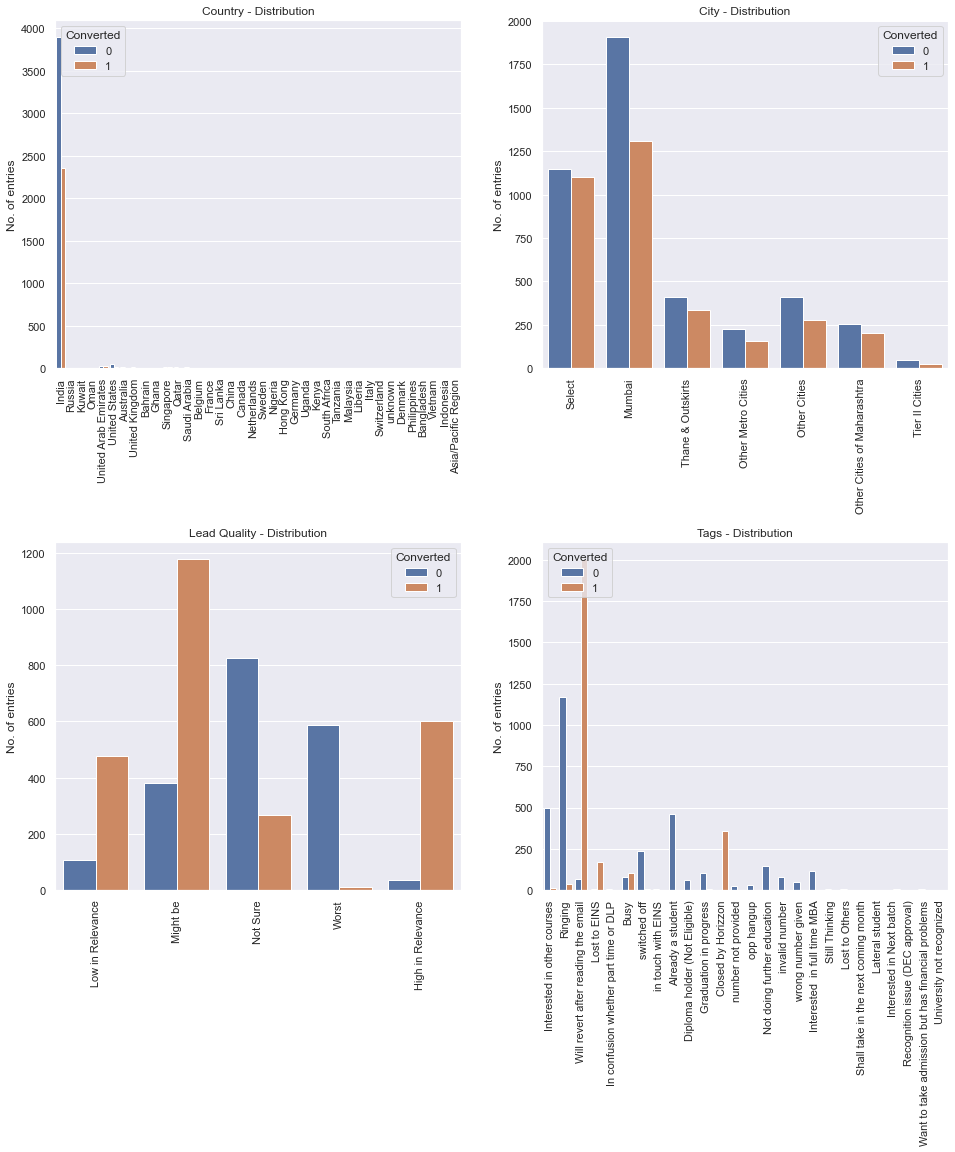

In [22]:
col_list_for_count2=['Country','City','Lead Quality','Tags']
sns.set(style="darkgrid")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count2)):
    plt.subplot(2, 2, i+1)
    var=col_list_for_count2[i]
    sns.countplot(x= var, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)


In [ ]:
# Dropping both the location fields

leads_df=leads_df.drop('Country',axis=1)
leads_df=leads_df.drop('City',axis=1)


In [23]:
# Check the column wise null percentages.

leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])


Lead Source                                       0.41
TotalVisits                                       1.57
Page Views Per Visit                              1.57
Last Activity                                     1.19
Country                                          23.85
Specialization                                    9.17
How did you hear about X Education               18.00
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     23.86
City                                              8.92
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
Asymmetrique Activity Score                      41.45
Asymmetrique Profile Score                       41.45
dtype: float64


In [24]:
# Verify the description of numerical field that are NULL
leads_df[['TotalVisits','Page Views Per Visit']].describe()


,TotalVisits,Page Views Per Visit
count,8441.000000,8441.000000
mean,3.603720,2.475223
std,4.954932,2.156764
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.500000
max,251.000000,55.000000


In [25]:
# Verify the description of numerical field which are having NULL
leads_df.loc[leads_df['TotalVisits'] == 3]['Page Views Per Visit'].describe()


count    1248.000000
mean        2.654247
std         0.648270
min         1.000000
25%         3.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Page Views Per Visit, dtype: float64

In [27]:
import numpy as np

# Impute the NULLs in "TotalVisits" using median
leads_df['TotalVisits'].fillna((leads_df['TotalVisits'].median()), inplace=True)

# Impute the NULLs in "Page Views Per Visit" using mean calculated using the "median value of TotalVisits"
leads_df['Page Views Per Visit'].replace(np.NaN,2.65,inplace=True)

# Check the remaining NULL fields
leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])


Lead Source                                       0.41
Last Activity                                     1.19
Country                                          23.85
Specialization                                    9.17
How did you hear about X Education               18.00
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     23.86
City                                              8.92
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
Asymmetrique Activity Score                      41.45
Asymmetrique Profile Score                       41.45
dtype: float64


In [ ]:
# For the Categorical variables "Lead Scource" and "Last Activity" - as the NULL count is very less, impute with MODE

leads_df['Lead Source'].fillna((leads_df['Lead Source'].mode()[0]), inplace=True)
leads_df['Last Activity'].fillna((leads_df['Last Activity'].mode()[0]), inplace=True)


In [ ]:
# Assign the np.NaN to the another 2 column values which are mentioned as Select
col_list_for_count3=['What is your current occupation','What matters most to you in choosing a course']

##Check the Unique values with counts in all remaining fields after replacing with np.NaN
for x in col_list_for_count3:
    leads_df[x].replace('Select',np.NaN,inplace=True)


# Visualising two variables
 

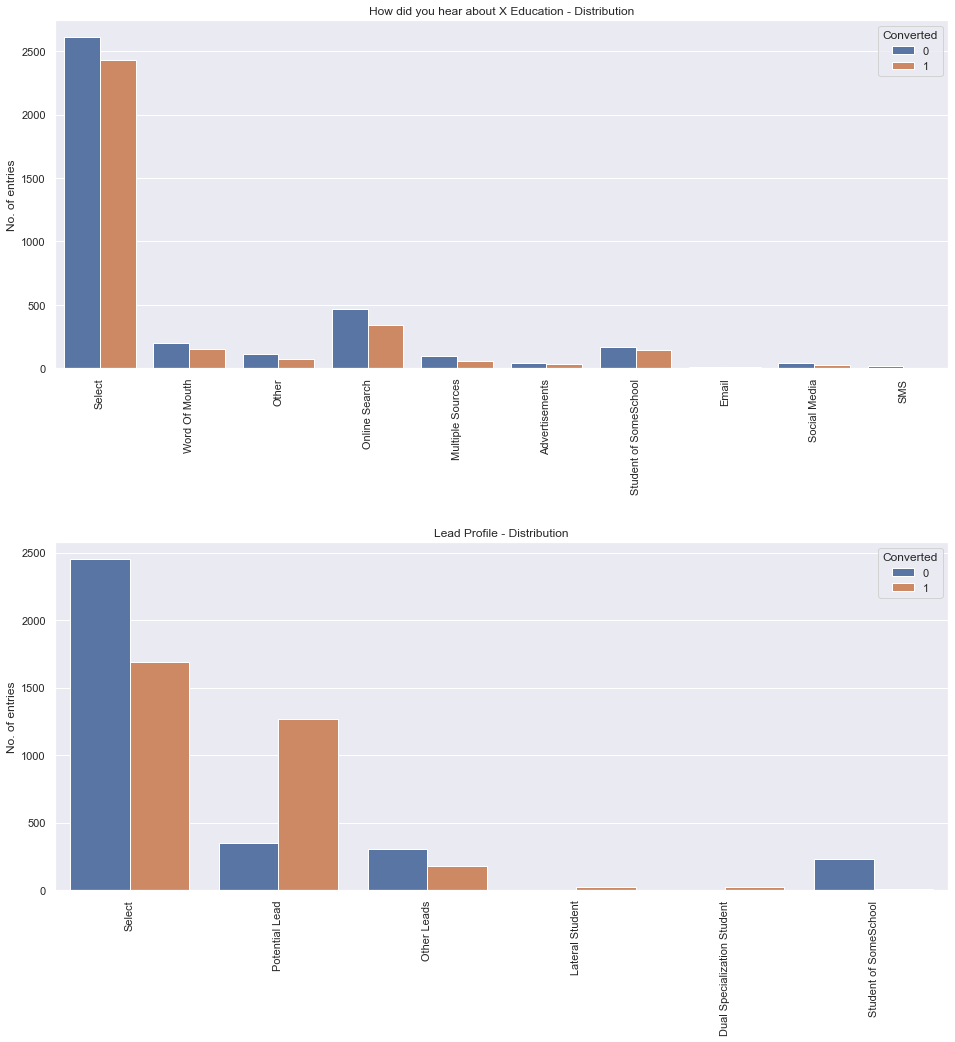

In [28]:
sns.set(style="darkgrid")

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count3)):
    plt.subplot(2, 1, i+1)
    var=col_list_for_count3[i]
    sns.countplot(x= var, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)


In [ ]:
# Drop the field
leads_df=leads_df.drop('What matters most to you in choosing a course',axis=1)


In [ ]:
# For occupation, let's replace the NaN values with Unknown as value as imputing with any other will create bias

leads_df['What is your current occupation'].fillna(('Unknown'), inplace=True)


Text(0.5, 0, '')

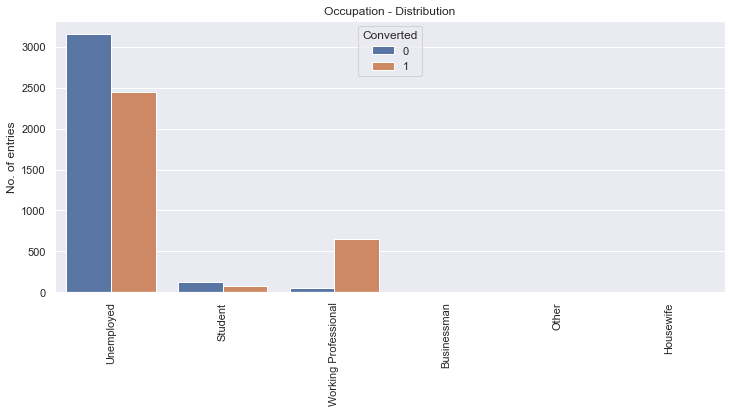

In [29]:
# Visualising the histogram of the distribution of occupation variables
plt.figure(figsize=(12,5))
sns.countplot(x= 'What is your current occupation', hue = 'Converted', data = leads_df)
plt.xticks(rotation=90)
plt.title('Plotting data for target in terms of total count')
plt.title('Occupation - Distribution')
plt.ylabel('No. of entries')
plt.xticks(rotation=90)
plt.xlabel(None)


# Checking and cleaning of remaining categorical variables


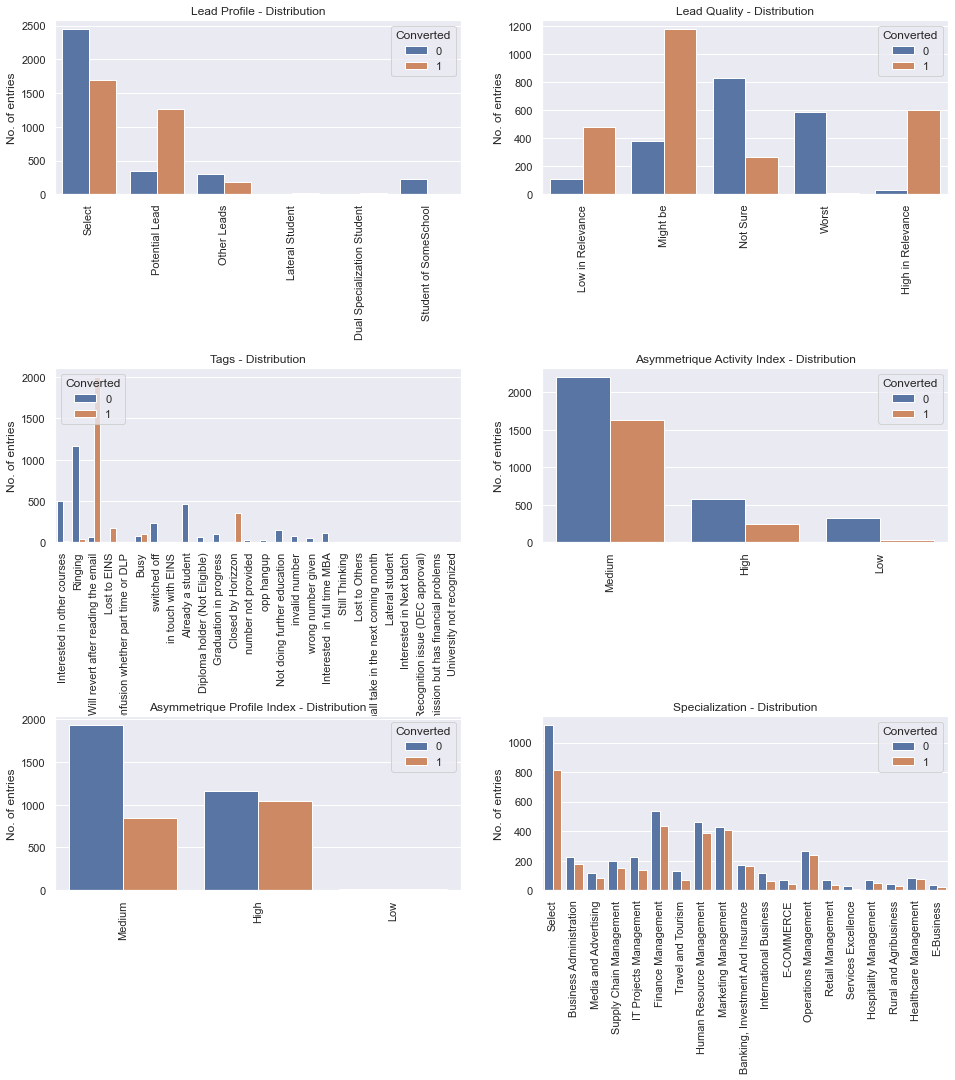

In [30]:
col_list_for_count4=['Lead Profile','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Specialization']

# Visualising the histogram of the distribution of these categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count4)):
    plt.subplot(3, 2, i+1)
    var=col_list_for_count4[i]
    sns.countplot(x= var, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)


# From the above graph, it is clear that the "Converted" output is heavily dependent on few specific values of "Tags","Lead Profile" and "Lead Quality". So Imputing these fields will create Bias. Lets call them as "Unknwon".
 

In [ ]:
# For Lead Profile, let's replace the NaN values with Unknown as value
leads_df['Lead Profile'].fillna(('Unknown'), inplace=True)

# For Lead Quality, let's replace the NaN values with Unknown as value
leads_df['Lead Quality'].fillna(('Unknown'), inplace=True) 

# For Tags, let's replace the NaN values with Unknown as value
leads_df['Tags'].fillna(('Unknown'), inplace=True)


In [ ]:
# For Specialization, let's replace the NaN values with Unknown as value
leads_df['Specialization'].fillna(('Unknown'), inplace=True)


# Imputing the Asymmetrique Index fields . Imputing is done using the same percentage distribution of the values in the column.
 

In [ ]:
x_df=pd.DataFrame(leads_df['Asymmetrique Profile Index'].value_counts())
x_df.reset_index(inplace=True)
x_df.columns=['Asymmetrique Profile Index','count']
x_df
sums=x_df['count'].sum()
null_len=len(leads_df.loc[leads_df['Asymmetrique Profile Index'].isnull() == True])
i=0
j=0
for p,row in leads_df.loc[leads_df['Asymmetrique Profile Index'].isnull() == True].iterrows():
    leads_df.at[p,'Asymmetrique Profile Index']=x_df['Asymmetrique Profile Index'][i]
    j=j+1
    if round(j/null_len*100,2) >= round(x_df['count'][i]/sums*100,2):
        j=0
        i=i+1


In [ ]:
x_df=pd.DataFrame(leads_df['Asymmetrique Activity Index'].value_counts())
x_df.reset_index(inplace=True)
x_df.columns=['Asymmetrique Activity Index','count']
x_df
sums=x_df['count'].sum()
null_len=len(leads_df.loc[leads_df['Asymmetrique Activity Index'].isnull() == True])
i=0
j=0
for p,row in leads_df.loc[leads_df['Asymmetrique Activity Index'].isnull() == True].iterrows():
    leads_df.at[p,'Asymmetrique Activity Index']=x_df['Asymmetrique Activity Index'][i]
    j=j+1
    if round(j/null_len*100,2) >= round(x_df['count'][i]/sums*100,2):
        j=0
        i=i+1


# Checking column distribution after changes


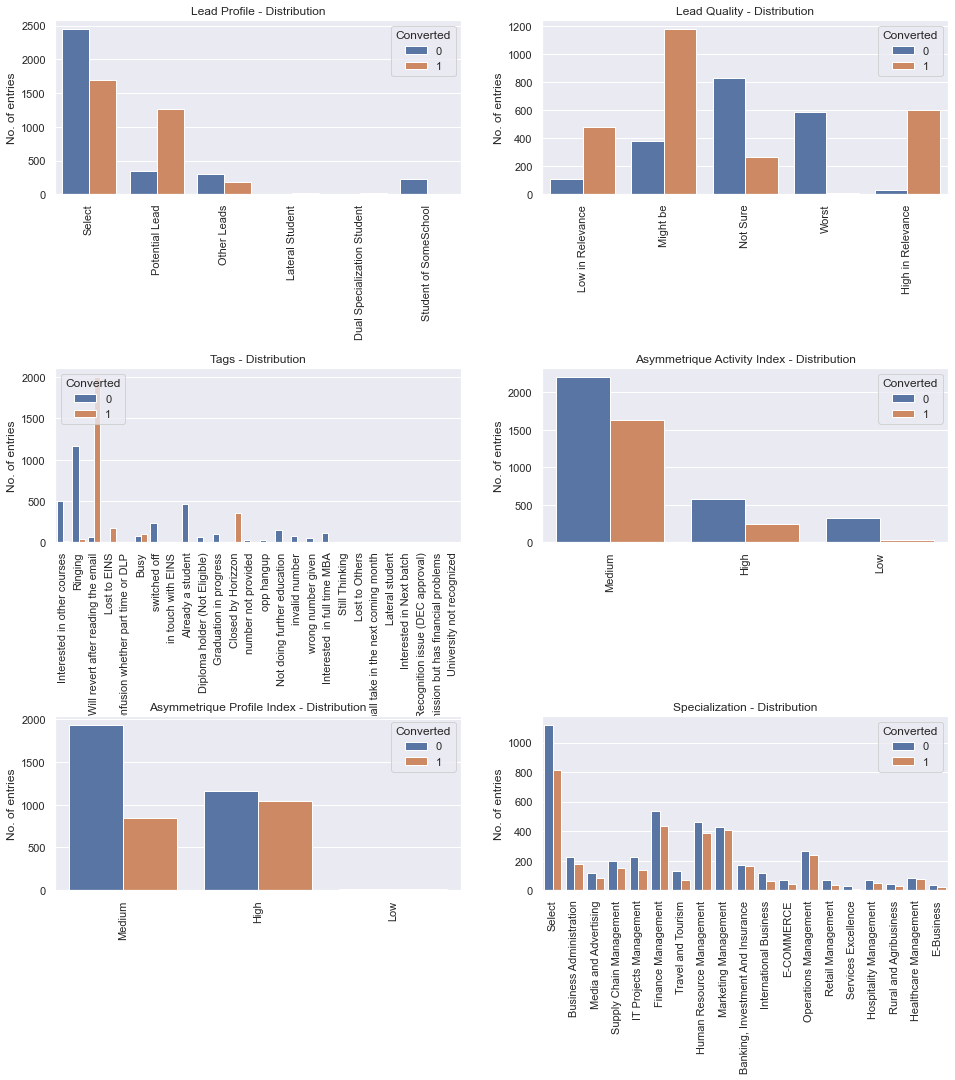

In [31]:
col_list_for_count4=['Lead Profile','Lead Quality','Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Specialization']

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_for_count4)):
    plt.subplot(3, 2, i+1)
    var=col_list_for_count4[i]
    #sns.countplot(leads_df[var])
    sns.countplot(x= var, hue = 'Converted', data = leads_df)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 1)


# Checking if any NULL fields are remaining
 

In [32]:
leads_null_fields=round((leads_df.isna().sum())/len(leads_df.index) * 100,2)
print(leads_null_fields[leads_null_fields > 0])


Lead Source                                       0.41
Last Activity                                     1.19
Country                                          23.85
Specialization                                    9.17
How did you hear about X Education               18.00
What is your current occupation                  23.64
What matters most to you in choosing a course    23.86
Tags                                             31.44
Lead Quality                                     47.84
Lead Profile                                     23.86
City                                              8.92
Asymmetrique Activity Index                      41.45
Asymmetrique Profile Index                       41.45
Asymmetrique Activity Score                      41.45
Asymmetrique Profile Score                       41.45
dtype: float64


In [33]:
leads_df.shape


(8576, 37)

# Checking how the values are distributed in the remaining Non-NULL Categorical variables


In [34]:
print(leads_df['Do Not Email'].value_counts())
print(leads_df['Do Not Call'].value_counts())
print(leads_df['Search'].value_counts())
print(leads_df['Newspaper Article'].value_counts())
print(leads_df['X Education Forums'].value_counts())
print(leads_df['Newspaper'].value_counts())
print(leads_df['Digital Advertisement'].value_counts())
print(leads_df['Through Recommendations'].value_counts())
print(leads_df['A free copy of Mastering The Interview'].value_counts())


No     7896
Yes     680
Name: Do Not Email, dtype: int64
No     8574
Yes       2
Name: Do Not Call, dtype: int64
No     8562
Yes      14
Name: Search, dtype: int64
No     8574
Yes       2
Name: Newspaper Article, dtype: int64
No     8575
Yes       1
Name: X Education Forums, dtype: int64
No     8575
Yes       1
Name: Newspaper, dtype: int64
No     8572
Yes       4
Name: Digital Advertisement, dtype: int64
No     8569
Yes       7
Name: Through Recommendations, dtype: int64
No     5694
Yes    2882
Name: A free copy of Mastering The Interview, dtype: int64


# Droping the columns that are heavily single-valued data. 


In [ ]:
# Drop the column with heavily single-valued data. These data fields don't add much to the Model
leads_df=leads_df.drop('Do Not Call',axis=1)
leads_df=leads_df.drop('Search',axis=1)
leads_df=leads_df.drop('Newspaper Article',axis=1)
leads_df=leads_df.drop('X Education Forums',axis=1)
leads_df=leads_df.drop('Newspaper',axis=1)
leads_df=leads_df.drop('Digital Advertisement',axis=1)
leads_df=leads_df.drop('Through Recommendations',axis=1)


# Numerical Variable ananlysis


In [35]:
# List out the numerical variables that are part of the DataFrame
num_vars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
leads_df[num_vars].describe()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8576.000000,8576.000000,8576.000000
mean,3.594216,509.471199,2.477975
std,4.916348,552.873572,2.139830
min,0.000000,0.000000,0.000000
25%,1.000000,34.000000,1.000000
50%,3.000000,268.000000,2.000000
75%,5.000000,972.000000,3.500000
max,251.000000,2272.000000,55.000000


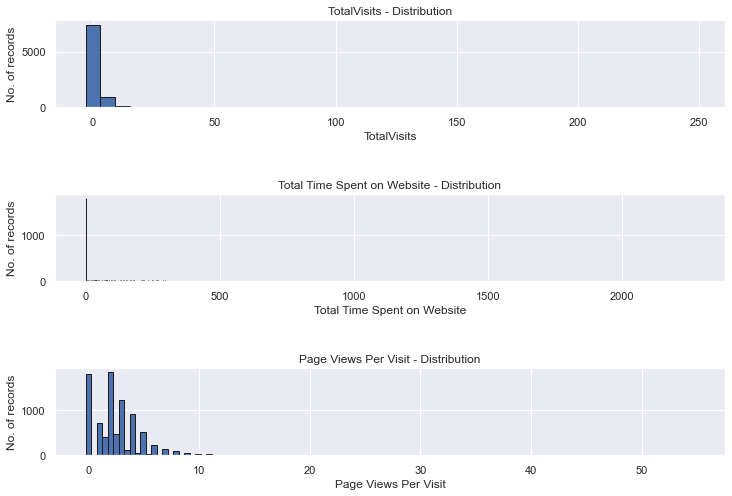

In [36]:
# Visualising the histogram of the distribution of all numeric variables
plt.figure(figsize=(12,8))
for i in range(len(num_vars)):
    plt.subplot(3,1, i+1)
    var=num_vars[i]
    leads_df[var].plot.hist(edgecolor = 'k',bins=(len(leads_df[var].unique())), align='left')
    plt.title(var+' - Distribution')
    plt.xlabel(var)
    plt.ylabel('No. of records')
    plt.subplots_adjust(hspace = 1)    


#  removing outliers


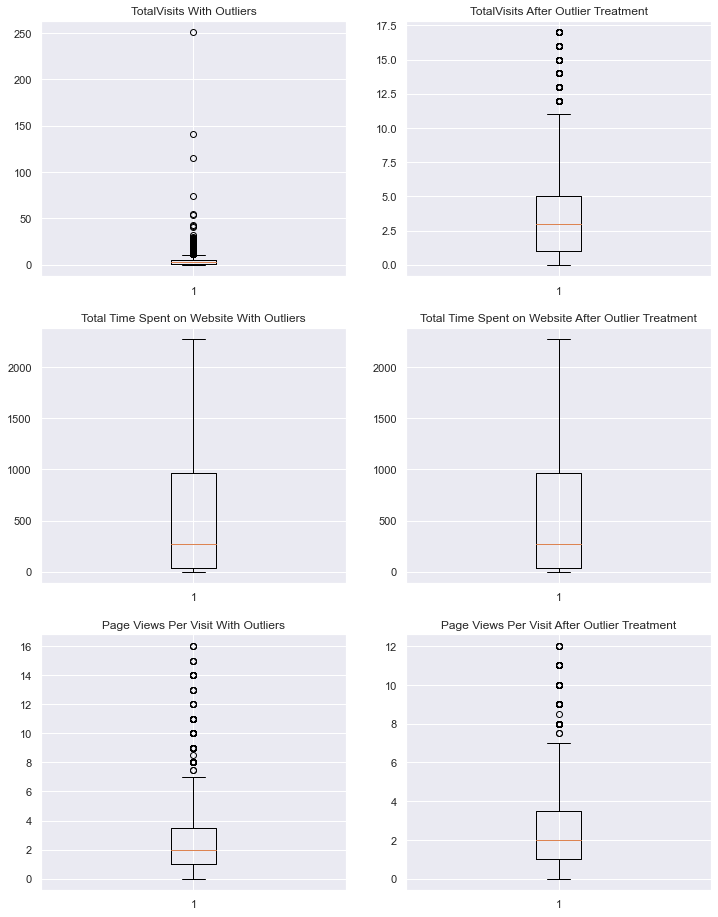

In [37]:
# Create a box plot of all the variables before and after Outlier treatment
plt.figure(figsize=(12,16))
pc_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
p=0
for j in range(len(pc_cols)):
    var=pc_cols[j]
    p=p+1
    plt.subplot(3, 2, p)
    plt.title(var+' With Outliers')
    plt.boxplot(leads_df[var])
    Q1 = leads_df[var].quantile(0.05)
    Q3 = leads_df[var].quantile(0.90)
    IQR = Q3 - Q1
    leads_df = leads_df[(leads_df[var] >= Q1 - 1.5*IQR) & (leads_df[var] <= Q3 + 1.5*IQR)]
    p=p+1
    plt.subplot(3, 2, p)
    plt.title(var+' After Outlier Treatment')
    plt.boxplot(leads_df[var])


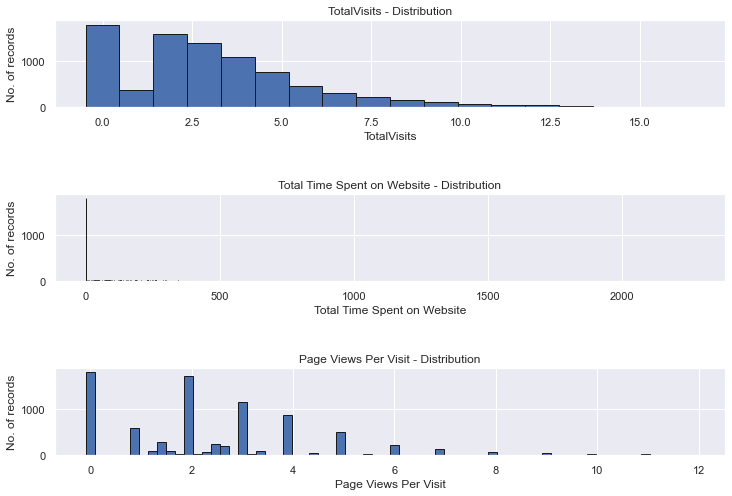

In [38]:
# Visualising the histogram of the distribution of all numeric variables after outlier treatment
plt.figure(figsize=(12,8))
for i in range(len(num_vars)):
    plt.subplot(3,1, i+1)
    var=num_vars[i]
    leads_df[var].plot.hist(edgecolor = 'k',bins=(len(leads_df[var].unique())), align='left')
    plt.title(var+' - Distribution')
    plt.xlabel(var)
    plt.ylabel('No. of records')
    plt.subplots_adjust(hspace = 1)    


Text(0, 0.5, 'No. of records')

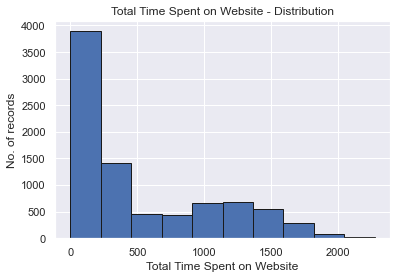

In [40]:
leads_df['Total Time Spent on Website'].plot.hist(edgecolor = 'k')
plt.title('Total Time Spent on Website - Distribution')
plt.xlabel('Total Time Spent on Website')
plt.ylabel('No. of records')



# Generating Heat map of the numerical data


<AxesSubplot:>

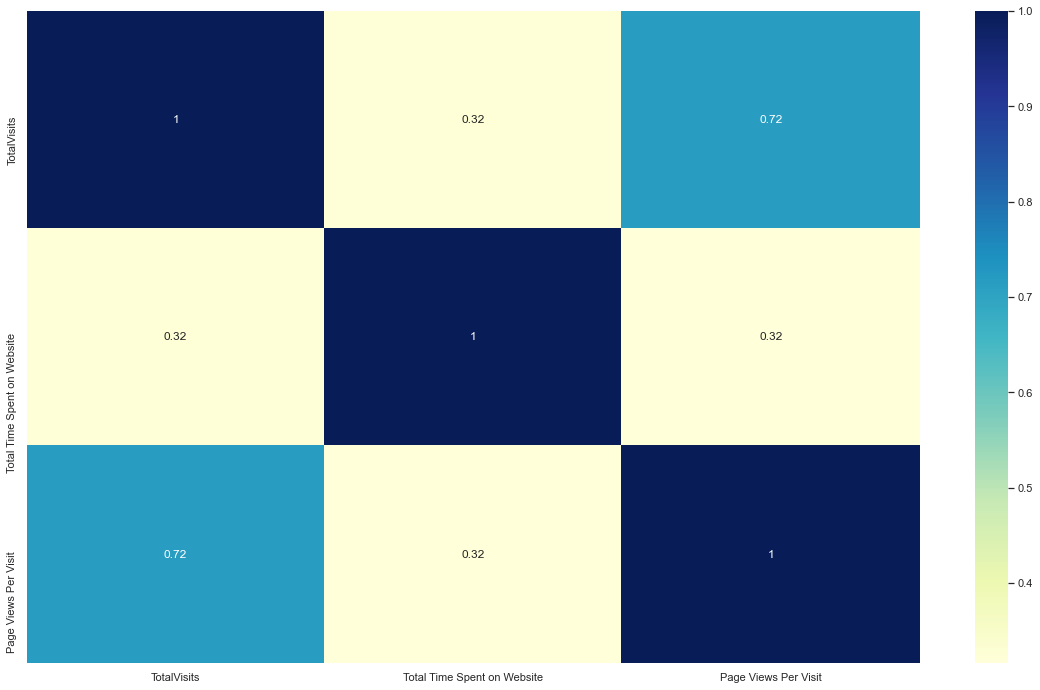

In [41]:
# Set the figure size
plt.figure(figsize=(20,12))

# Generate the heatmap
sns.heatmap(leads_df[pc_cols].corr(),cmap='YlGnBu', annot=True)


# Generate the Pie chart distribution of the Target Variable


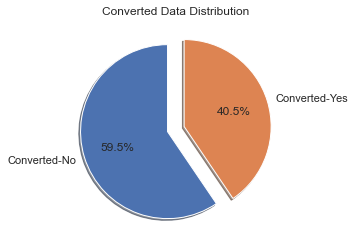

In [42]:
explode = (0.1, 0.1) 
pie_labels = ['Converted-No', 'Converted-Yes']
pie_sizes_m = leads_df['Converted'].value_counts()/len(leads_df.index) * 100
plt.pie(pie_sizes_m, labels=pie_labels, explode = explode, autopct='%1.1f%%',shadow=True, startangle=90)
plt.title('Converted Data Distribution')

plt.show()


In [43]:
leads_df['Converted'].value_counts()


0    5041
1    3433
Name: Converted, dtype: int64

In [44]:
leads_df.shape


(8474, 37)

# 2 : Encoding of Categorical variables


In [45]:
print(leads_df['Do Not Email'].value_counts())
print(leads_df['A free copy of Mastering The Interview'].value_counts())


No     7813
Yes     661
Name: Do Not Email, dtype: int64
No     5656
Yes    2818
Name: A free copy of Mastering The Interview, dtype: int64


In [46]:
yes_no_list=['Do Not Email','A free copy of Mastering The Interview']

for var in yes_no_list:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(leads_df[var],prefix=var)
    leads_df = pd.concat([leads_df,dummy_df], axis=1)
    # Dropping the "Yes" entries as they are less in number
    leads_df.drop([var,var+'_Yes'], axis =1 , inplace=True)

leads_df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,Last Notable Activity,Do Not Email_No,A free copy of Mastering The Interview_No
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,...,Select,Select,Medium,Medium,15.0,15.0,No,Modified,1,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,...,Select,Select,Medium,Medium,15.0,15.0,No,Email Opened,1,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,...,Potential Lead,Mumbai,Medium,High,14.0,20.0,No,Email Opened,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,...,Select,Mumbai,Medium,High,13.0,17.0,No,Modified,1,1
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,...,Select,Mumbai,Medium,High,15.0,18.0,No,Modified,1,1


# Checking  values in the categorical variables and group the minor values into one single dummy value.


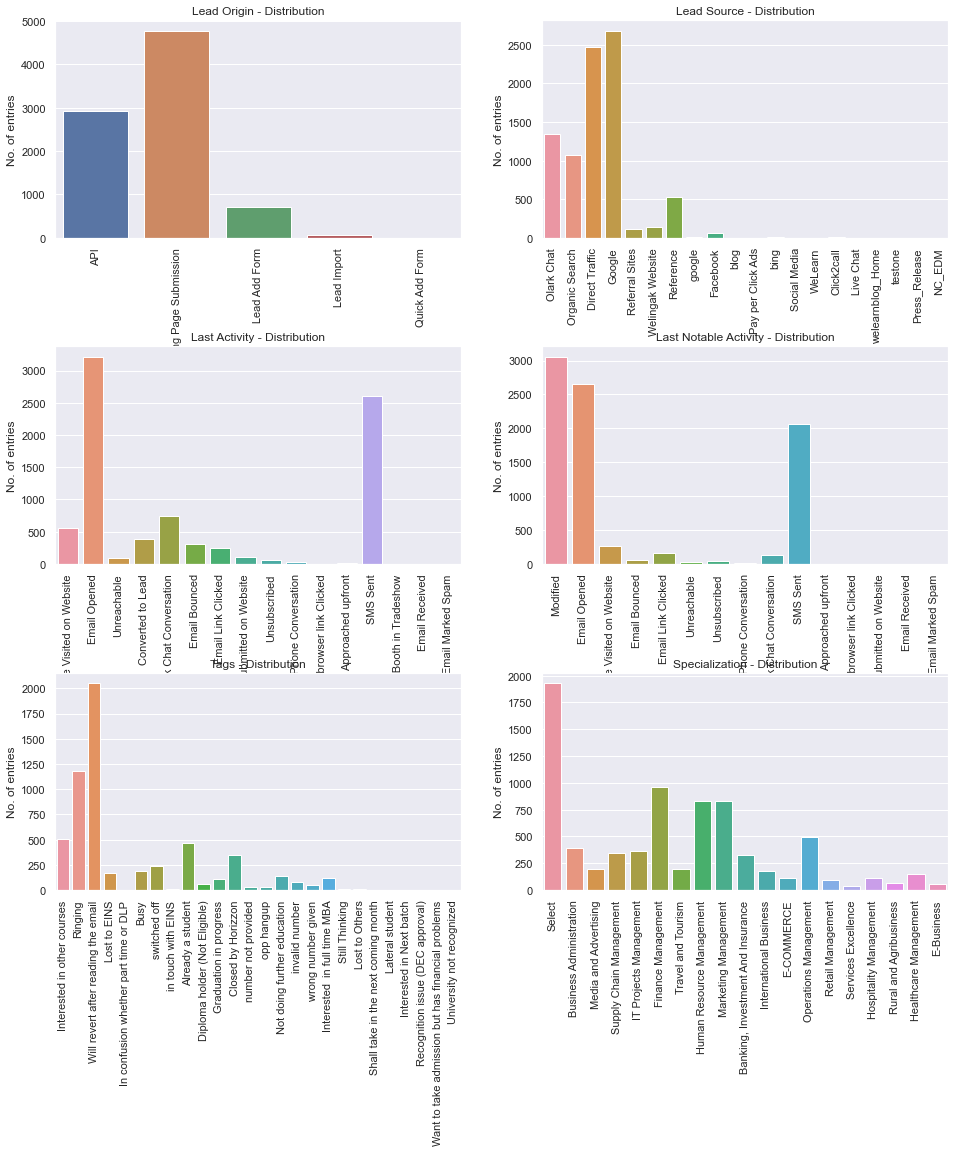

In [47]:
col_list_categ=['Lead Origin','Lead Source','Last Activity','Last Notable Activity','Tags','Specialization']

# Visualising the histogram of the distribution of all categorical variables
plt.figure(figsize=(16,16))
for i in range(len(col_list_categ)):
    plt.subplot(3, 2, i+1)
    var=col_list_categ[i]
    sns.countplot(x=var, data=leads_df)
    plt.title(var+' - Distribution')
    plt.ylabel('No. of entries')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.subplots_adjust(hspace = 0.5)


In [48]:
print(leads_df['Tags'].value_counts())
print(leads_df['Specialization'].value_counts())


Will revert after reading the email                  2053
Ringing                                              1182
Interested in other courses                           506
Already a student                                     462
Closed by Horizzon                                    348
switched off                                          237
Busy                                                  185
Lost to EINS                                          169
Not doing further education                           138
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     46
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [49]:
##Group the minor values of these column into one single viz. Others
for p,row in leads_df.iterrows():
    if leads_df.at[p,'Lead Origin']== 'Quick Add Form':
        leads_df.at[p,'Lead Origin'] = 'Others'
    
    if leads_df.at[p,'Lead Source']== 'google':
        leads_df.at[p,'Lead Source'] = 'Google'
    elif leads_df.at[p,'Lead Source'] in (['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','welearnblog_Home','testone','Press_Release','NC_EDM']):
        leads_df.at[p,'Lead Source'] = 'Others'
    
    if leads_df.at[p,'Last Activity'] in (['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Visited Booth in Tradeshow']):
        leads_df.at[p,'Last Activity'] = 'Others'
    
    if leads_df.at[p,'Last Notable Activity'] in (['Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','View in browser link Clicked','Email Received','Form Submitted on Website']):
        leads_df.at[p,'Last Notable Activity'] = 'Others'
    
    if leads_df.at[p,'Tags'] in (['wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems','Still Thinking','Interested in Next batch','In confusion whether part time or DLP','Lateral student','University not recognized','Shall take in the next coming month','Recognition issue (DEC approval)']):
        leads_df.at[p,'Tags'] = 'Others'
        
print(leads_df['Lead Origin'].value_counts())
print(leads_df['Lead Source'].value_counts())
print(leads_df['Last Activity'].value_counts())
print(leads_df['Last Notable Activity'].value_counts())
print(leads_df['Tags'].value_counts())


Landing Page Submission    4775
API                        2927
Lead Add Form               716
Lead Import                  55
Others                        1
Name: Lead Origin, dtype: int64
Google              2689
Direct Traffic      2471
Olark Chat          1345
Organic Search      1066
Reference            533
Welingak Website     142
Referral Sites       119
Facebook              55
Others                19
Name: Lead Source, dtype: int64
Email Opened                 3213
SMS Sent                     2610
Olark Chat Conversation       750
Page Visited on Website       557
Converted to Lead             389
Email Bounced                 301
Email Link Clicked            246
Form Submitted on Website     113
Unreachable                    89
Unsubscribed                   56
Others                         48
Name: Last Activity, dtype: int64
Modified                   3055
Email Opened               2651
SMS Sent                   2063
Page Visited on Website     259
Email Link Clic

In [50]:
#Create the dummy variables and drop the "Others" values
col_list_categ=['Lead Origin','Lead Source','Last Activity','Last Notable Activity']

for var in col_list_categ:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(leads_df[var],prefix=var)
    leads_df = pd.concat([leads_df,dummy_df], axis=1)
    # Dropping the Others entries as they are less in number
    leads_df.drop([var,var+'_Others'], axis =1 , inplace=True)

leads_df.head()


,Prospect ID,Lead Number,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,...,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,No,0,0.0,0,0.0,NaN,Select,Select,...,0,0,0,0,0,1,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,No,0,5.0,674,2.5,India,Select,Select,...,0,0,0,0,1,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,No,1,2.0,1532,2.0,India,Business Administration,Select,...,0,0,0,0,1,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,No,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,...,1,0,0,0,0,1,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,No,1,2.0,1428,1.0,India,Select,Other,...,0,0,0,0,0,1,0,0,0,0


In [56]:
# Dummy Variables for Index columns
col_list_categ_3=['Asymmetrique Activity Index','Asymmetrique Profile Index']

for var in col_list_categ_3:
    # Creating dummy variables for category variables
    dummy_df = pd.get_dummies(leads_df[var],prefix=var)
    leads_df = pd.concat([leads_df,dummy_df], axis=1)
    # Dropping the Others entries as they are less in number
    leads_df.drop([var,var+'_Low'], axis =1 , inplace=True)

leads_df.head()


,Prospect ID,Lead Number,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,No,0,0.0,0,0.0,NaN,Select,Select,...,0,0,1,0,0,0,0,1,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,No,0,5.0,674,2.5,India,Select,Select,...,0,0,1,0,0,0,0,1,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,No,1,2.0,1532,2.0,India,Business Administration,Select,...,0,0,0,0,0,0,0,1,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,No,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,...,0,0,0,0,0,0,0,1,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,No,1,2.0,1428,1.0,India,Select,Other,...,0,0,1,0,0,0,0,1,1,0


In [57]:
leads_df.shape


(8474, 160)

# 3. Test-Train Split


In [58]:
# Drop the Lead Number, Converted fields to form the X features
X=leads_df.drop(['Lead Number','Converted'], axis =1)
X.head()


,Prospect ID,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,No,0.0,0,0.0,NaN,Select,Select,Unemployed,Better Career Prospects,...,0,0,1,0,0,0,0,1,0,1
1,2a272436-5132-4136-86fa-dcc88c88f482,No,5.0,674,2.5,India,Select,Select,Unemployed,Better Career Prospects,...,0,0,1,0,0,0,0,1,0,1
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,No,2.0,1532,2.0,India,Business Administration,Select,Student,Better Career Prospects,...,0,0,0,0,0,0,0,1,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,No,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,...,0,0,0,0,0,0,0,1,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,No,2.0,1428,1.0,India,Select,Other,Unemployed,Better Career Prospects,...,0,0,1,0,0,0,0,1,1,0


In [59]:
# Create the Y variable
y = leads_df['Converted']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

# Splitting the data into train and test


In [ ]:
# Split 70:30 into Training and Test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)


In [73]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Split 70:30 into Training and Test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

# To Split the data into traning & test data sets
from sklearn.model_selection import train_test_split

# For Standardisation & Scaling
from sklearn.preprocessing import StandardScaler

# Scale the numerical data to remove disparities in magnitude and scales of numerical variables
num_vars= ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

scaler = StandardScaler()


X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()


,Prospect ID,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,...,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Asymmetrique Activity Index_High,Asymmetrique Activity Index_Medium,Asymmetrique Profile Index_High,Asymmetrique Profile Index_Medium
4278,61eb8da1-f92c-40da-8ff5-87fc6b4f0143,No,-0.454824,-0.101516,-0.226094,India,Marketing Management,Select,Unemployed,Better Career Prospects,...,0,0,0,0,0,0,0,0,0,0
5893,9ee0cb12-1da7-4285-8722-e6cae796ea91,No,-0.454824,0.038946,-0.226094,Saudi Arabia,International Business,Select,Unemployed,Better Career Prospects,...,0,0,0,0,0,0,0,0,0,0
380,701994c7-5df0-4b87-9a44-96a96f3acefb,No,-1.137752,-0.919072,-1.240916,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,1
8976,6a98cbc0-0a38-42a7-993c-d11d7615616f,No,-0.796288,-0.890260,-0.733505,India,Marketing Management,Select,Unemployed,Better Career Prospects,...,0,0,0,0,0,0,0,1,0,1
4197,01199a8f-c9c1-4410-a1d5-0345c6d67e70,No,-1.137752,-0.919072,-1.240916,NaN,Finance Management,Select,Unemployed,Better Career Prospects,...,0,0,0,0,0,0,0,0,0,0


# 4: Model Building


In [39]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

X, y = make_regression(random_state=0)

lm = LinearRegression()
rfe = RFE(lm)

grid = GridSearchCV(rfe, {"n_features_to_select": [3, 4]},
                   scoring= 'neg_mean_squared_error')
grid.fit(X, y)

# This is how to get the support
grid.best_estimator_.support_




array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False])

In [ ]:
from sklearn.model_selection import train_test_split

y = leads['Converted']
X=leads.drop('Converted', axis=1)


In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


# scaling of data

In [117]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1886,c89e2773-1d4b-4bb4-8361-bee120c418c0,1.041929,Landing Page Submission,Direct Traffic,No,No,-0.094839,1.048346,0.288708,Email Opened,...,No,Potential Lead,Thane & Outskirts,02.Medium,02.Medium,0.497079,-0.204570,No,Yes,Email Opened
9139,3e483954-1508-4b8b-9534-59f8a2a2dc6b,-1.575447,Landing Page Submission,Organic Search,No,No,0.295065,-0.421425,1.199441,Page Visited on Website,...,No,Potential Lead,Mumbai,02.Medium,01.High,0.497079,0.341877,No,Yes,Modified
1786,f1007120-187c-4f78-9bfd-251a9ec08acb,1.075476,API,Olark Chat,No,No,-0.679695,-0.886426,-1.077392,SMS Sent,...,No,Select,Select,02.Medium,02.Medium,0.497079,-0.751016,No,No,SMS Sent
1590,5f98ae85-3c6c-496a-9a70-40ee2d906c63,1.148883,API,Olark Chat,No,No,-0.679695,-0.886426,-1.077392,Olark Chat Conversation,...,No,NaN,NaN,02.Medium,02.Medium,0.497079,-0.751016,No,No,Modified
6623,b5961965-9306-4fd4-8557-cd886d3c778e,-0.775823,API,Olark Chat,No,No,-0.679695,-0.886426,-1.077392,Olark Chat Conversation,...,No,Student of SomeSchool,Select,NaN,NaN,NaN,NaN,No,No,Modified
